In [3]:
import pandas as pd
import numpy as np

# sklearn import s for modelling parts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score ,balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl


from PIL import Image

import nltk
from nltk.corpus import stopwords

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgm
from lightgbm import LGBMClassifier


ModuleNotFoundError: No module named 'xgboost'

In [7]:
pd.options.display.max_columns=100 # To see hidden columns in dataframe

In [8]:
df=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/DS Project 2/Musical_Instruments.csv',low_memory=False)

In [9]:
df.head()

,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,overall
0,90,False,"08 9, 2004",AXHY24HWOF184,B0007Y09VO,{'Format:': ' Paperback'},Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,1092009600,5
1,2,True,"04 6, 2017",A29OWR79AM796H,B0007Y09VO,{'Format:': ' Hardcover'},Amazon Customer,Very helpful...,Four Stars,1491436800,4
2,NaN,True,"03 14, 2017",AUPWU27A7X5F6,B0007Y09VO,{'Format:': ' Paperback'},Amazon Customer,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Five Stars,1489449600,5
3,NaN,True,"02 14, 2017",A1N69A47D4JO6K,B0007Y09VO,{'Format:': ' Paperback'},Christopher Burnett,My girlfriend use quite often,Four Stars,1487030400,4
4,NaN,True,"01 29, 2017",AHTIQUMVCGBFJ,B0007Y09VO,{'Format:': ' Paperback'},Amazon Customer,Arrived as described. Very happy.,Very happy.,1485648000,5


In [11]:
df1=df.drop(['vote','unixReviewTime'],axis=1)
df1

,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,overall
0,False,"08 9, 2004",AXHY24HWOF184,B0007Y09VO,{'Format:': ' Paperback'},Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,5
1,True,"04 6, 2017",A29OWR79AM796H,B0007Y09VO,{'Format:': ' Hardcover'},Amazon Customer,Very helpful...,Four Stars,4
2,True,"03 14, 2017",AUPWU27A7X5F6,B0007Y09VO,{'Format:': ' Paperback'},Amazon Customer,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Five Stars,5
3,True,"02 14, 2017",A1N69A47D4JO6K,B0007Y09VO,{'Format:': ' Paperback'},Christopher Burnett,My girlfriend use quite often,Four Stars,4
4,True,"01 29, 2017",AHTIQUMVCGBFJ,B0007Y09VO,{'Format:': ' Paperback'},Amazon Customer,Arrived as described. Very happy.,Very happy.,5
...,...,...,...,...,...,...,...,...,...
772997,True,"07 7, 2016",A3S0CA3GLR27BY,B0154JDL1Q,{'Color:': ' Small'},L.E.B. Enterprises,been searching for a small portable waist amp ...,... searching for a small portable waist amp t...,5
772998,False,"06 15, 2016",AXO3PA17C50V0,B0154JDL1Q,{'Color:': ' Small'},Rebecca Gregory,Bought this for my son who has been playing fo...,sounds great and is perfect for traveling,5
772999,True,"04 26, 2016",A2IFY7DN7PKSV1,B0154JDL1Q,{'Color:': ' Small'},jjua,This is my new toy!! I can now practice guitar...,This is my new toy!!,4
773000,False,"07 6, 2016",A14KL0CZ0P4BXM,B0154LU8A6,{'Color:': ' Sweet Leo O2'},Amazon Customer,The X-vive Sweet Leo is a brilliant overdrive ...,What did you Leo say,5


In [12]:
instruments=df1.iloc[:800,:]
instruments

,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,overall
0,False,"08 9, 2004",AXHY24HWOF184,B0007Y09VO,{'Format:': ' Paperback'},Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,5
1,True,"04 6, 2017",A29OWR79AM796H,B0007Y09VO,{'Format:': ' Hardcover'},Amazon Customer,Very helpful...,Four Stars,4
2,True,"03 14, 2017",AUPWU27A7X5F6,B0007Y09VO,{'Format:': ' Paperback'},Amazon Customer,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Five Stars,5
3,True,"02 14, 2017",A1N69A47D4JO6K,B0007Y09VO,{'Format:': ' Paperback'},Christopher Burnett,My girlfriend use quite often,Four Stars,4
4,True,"01 29, 2017",AHTIQUMVCGBFJ,B0007Y09VO,{'Format:': ' Paperback'},Amazon Customer,Arrived as described. Very happy.,Very happy.,5
...,...,...,...,...,...,...,...,...,...
795,True,"04 24, 2014",A69MAQH7YSJT1,B0007Y6NZ262,NaN,Francisco J. Russi,use it,I like it,4
796,True,"04 23, 2014",A34E7AQBJKHJVJ,B0007Y6NZ263,NaN,Elena,I saw people learning the uke instantly at my ...,Better than I thought It Would Be - Great for ...,5
797,True,"04 22, 2014",AA4BO7WP95JAR,B0007Y6NZ264,NaN,Steve,I didn't think anyone could screw up a ukulele...,Terrible instrument. You get what you pay for.,1
798,True,"04 14, 2014",A35BABWG5NUC4K,B0007Y6NZ265,NaN,V. Gourishankar,I am really happy with this started pack. It h...,My learning Exp,5


In [8]:
instruments.shape # now its 10 columns

(800, 9)

In [9]:
instruments.isnull().sum()

verified          0
reviewTime        0
reviewerID        0
asin              0
style           557
reviewerName      1
reviewText        0
summary           0
overall           0
dtype: int64

* The important columns for my project is overall and reviewText and both have 0 nulls

In [10]:
instruments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   verified      800 non-null    bool  
 1   reviewTime    800 non-null    object
 2   reviewerID    800 non-null    object
 3   asin          800 non-null    object
 4   style         243 non-null    object
 5   reviewerName  799 non-null    object
 6   reviewText    800 non-null    object
 7   summary       800 non-null    object
 8   overall       800 non-null    int64 
dtypes: bool(1), int64(1), object(7)
memory usage: 50.9+ KB


In [11]:
instruments['overall'].value_counts()

5    396
4    153
1    123
3     79
2     49
Name: overall, dtype: int64

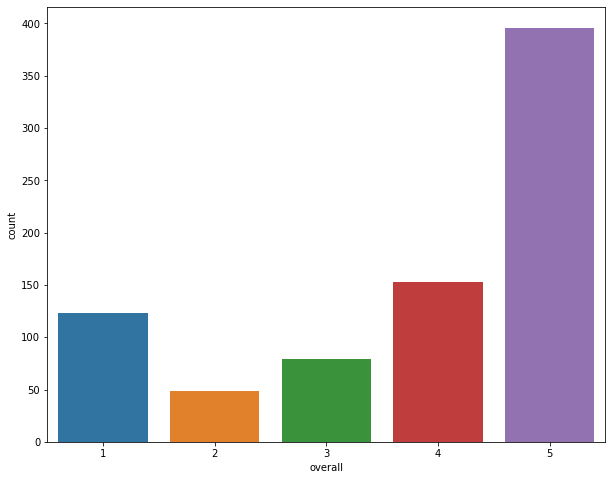

In [12]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='overall',data=instruments)

<AxesSubplot:xlabel='overall', ylabel='Density'>

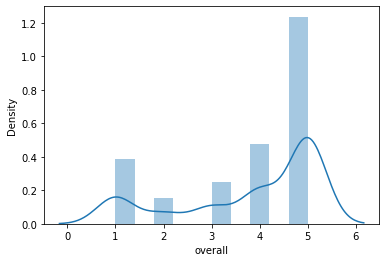

In [13]:
sns.distplot(instruments['overall'])

In [14]:
instruments['verified'].value_counts()

True     723
False     77
Name: verified, dtype: int64

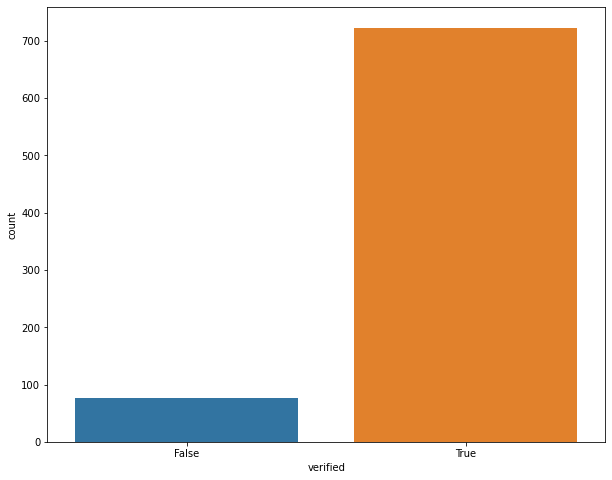

In [15]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='verified',data=instruments)

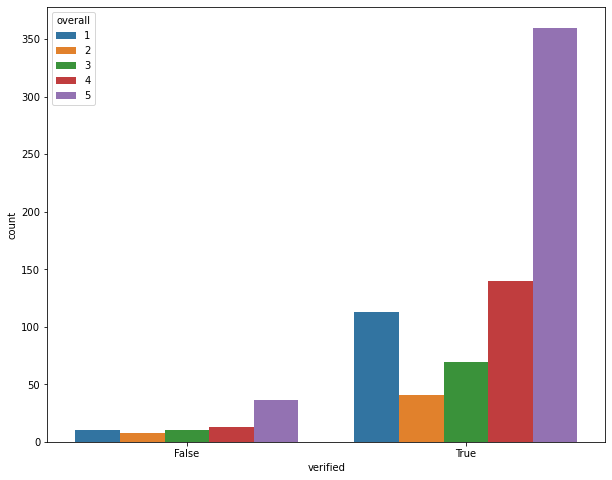

In [16]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='verified',hue='overall',data=instruments)

In [17]:
instruments['reviewTime'].nunique()

585

Review time is daily-based in our data. So, it means that data is collected from 4828 different days.

# Converting Data from String to Datetime to Divide Day, Month and Years

In [18]:
# convert to datetime
instruments['reviewTime']=pd.to_datetime(instruments['reviewTime'])

In [19]:
# to convert reviewTime column to day, month and year
instruments['day']=instruments['reviewTime'].dt.day
instruments['month']=instruments['reviewTime'].dt.month
instruments['year']=instruments['reviewTime'].dt.year

# Year wise 

In [20]:
# the count values shows in ascending orders
instruments['year'].value_counts()

2015    264
2014    217
2016    157
2013     63
2012     40
2011     15
2009      8
2010      8
2017      8
2006      6
2005      5
2007      5
2004      2
2008      2
Name: year, dtype: int64

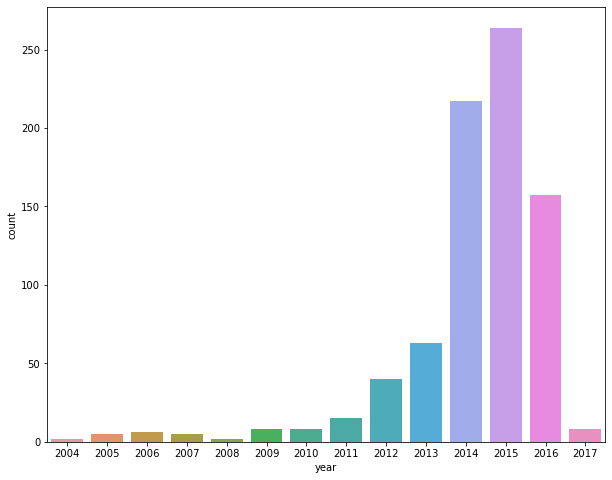

In [21]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='year',data=instruments)

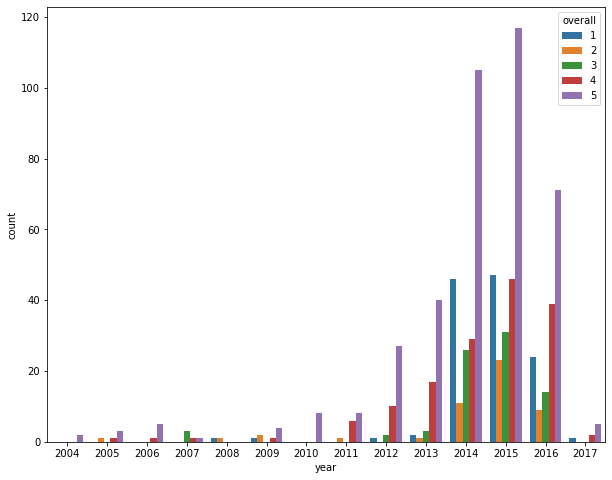

In [22]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='year',hue='overall',data=instruments)

The year 2014,2015,2016 have higer ratings 

# Month wise

In [23]:
instruments['month'].value_counts()

1     110
12    106
2      78
4      74
6      74
8      62
7      58
9      58
3      51
5      48
11     42
10     39
Name: month, dtype: int64

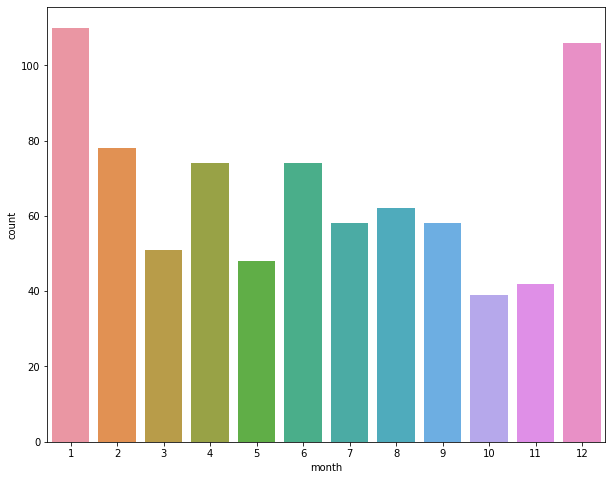

In [24]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='month',data=instruments)

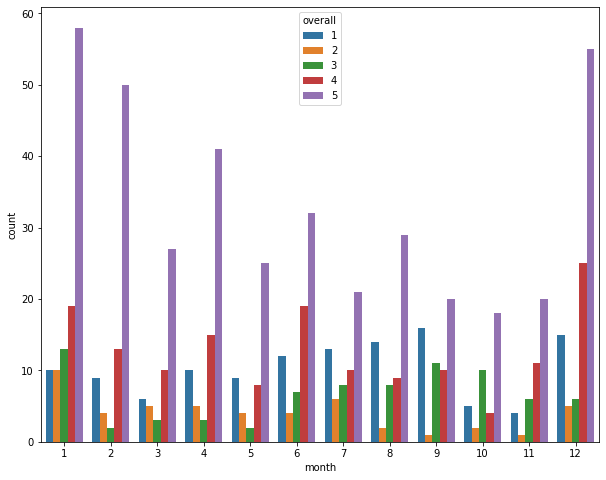

In [25]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='month',hue='overall',data=instruments)

Month wise ratings is good

In [26]:
instruments.groupby('month')['overall'].mean()

month
1     3.954545
2     4.166667
3     3.921569
4     3.972973
5     3.750000
6     3.743243
7     3.344828
8     3.596774
9     3.293103
10    3.717949
11    4.000000
12    3.943396
Name: overall, dtype: float64

The average ratings of 2nd and 11th moth is higher and all others are similar

# Day wise

In [27]:
instruments['day'].value_counts()

24    38
13    37
17    35
28    34
14    32
4     31
3     30
6     30
27    30
7     29
26    29
16    28
29    28
19    26
1     25
15    24
11    24
25    24
10    24
5     24
2     23
21    23
20    22
8     22
18    21
22    20
9     19
30    19
12    18
23    18
31    13
Name: day, dtype: int64

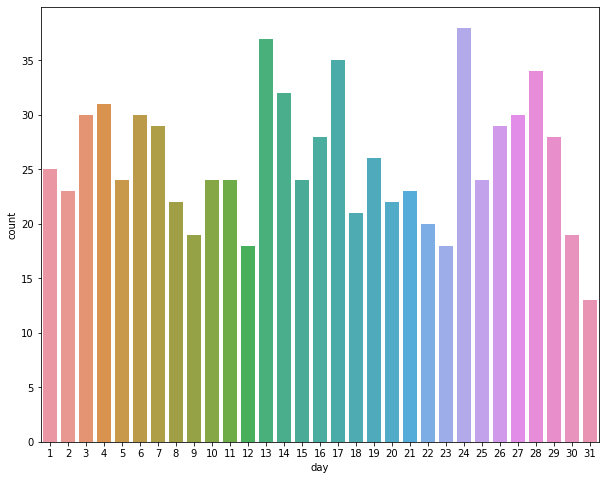

In [28]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='day',data=instruments)

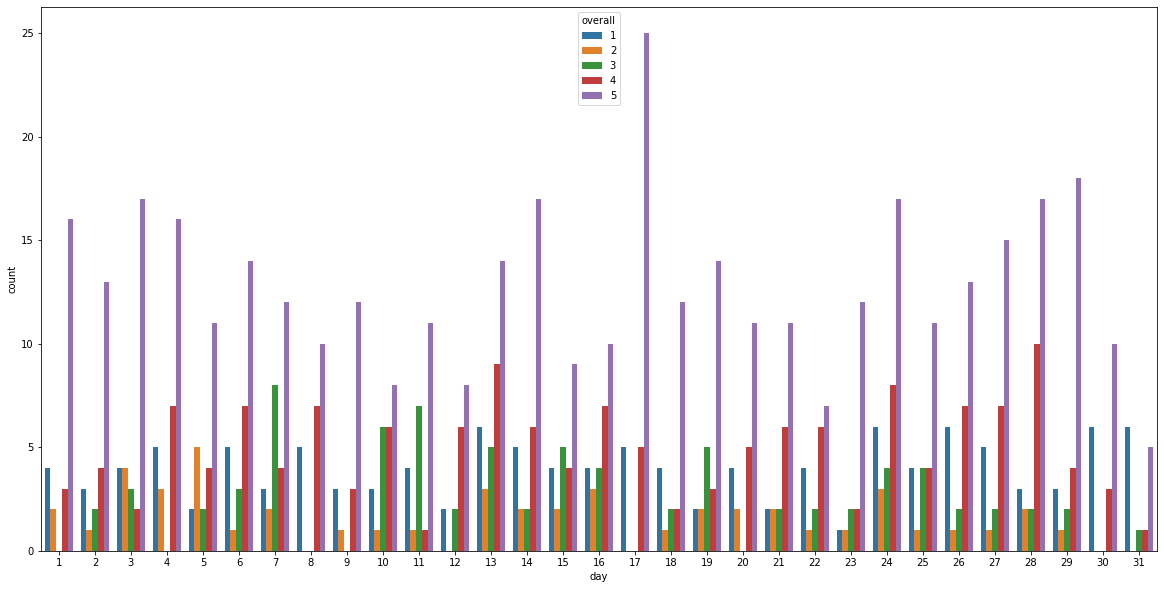

In [29]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='day',hue='overall',data=instruments)

According to plots above our data distribution is nearly same for each day except 17th day

# Looking to reviewers

In [30]:
instruments['reviewerID'].nunique()

800

there are 800 different ID for reviews data

In [31]:
instruments['reviewerName'].nunique()

743

Here Name is less than ID.it means some people use same names with each other.so i'll drop this column

In [32]:
instruments.drop(columns=['reviewerName'],inplace=True) # dropping reviewerName column

# Looking to Reviewers According to Ratings

In [33]:
instruments.groupby('reviewerID')['overall'].mean().sort_values(ascending=False).head(100) # Top 100 have higher ratings

reviewerID
A0005916MHK9RK69491E    5
A306X8KBEPZ81S          5
A347LQX3G500YN          5
A346WRB1NLSG10          5
A33UN0JA2Q765F          5
                       ..
A2C4MOY8LNOHN6          5
A2C3JWKKLR9P0C          5
A2C1GXJXLXX14J          5
A2BX2YVZ6OIR21          5
A2L5OKHZ8WELI6          5
Name: overall, Length: 100, dtype: int64

In [34]:
instruments.groupby('reviewerID')['asin'].count().sort_values(ascending=False).head(100)

reviewerID
A0005916MHK9RK69491E    1
A3H979O257HT3Y          1
A3FO5AKVTFRCRJ          1
A3FPBW4OEWTOIG          1
A3GFXBJ7H94DZL          1
                       ..
A3MUZ9LSZ64YT6          1
A3N5ABBYEKCBY7          1
A3N9U9Y01RBKMH          1
A3NBI7IPRK92AF          1
A3BPR04VRBRGPS          1
Name: asin, Length: 100, dtype: int64

# Looking to Top 2 User According to Review Number

In [35]:
instruments.loc[instruments['reviewerID']=='A0005916MHK9RK69491E'].groupby('overall')['asin'].count()

overall
5    1
Name: asin, dtype: int64

In [36]:
instruments.loc[instruments['reviewerID']=='A3H979O257HT3Y'].groupby('overall')['asin'].count()

overall
5    1
Name: asin, dtype: int64

In [37]:
instruments['asin'].nunique() # Number of instruments in dataset 

269

In [38]:
instruments.groupby('asin')['overall'].mean().sort_values(ascending=False).head(20)

asin
B0007Y6NZ218    5.0
B0007Y6NZ250    5.0
B0007Y6NZ256    5.0
B0007Y6NZ257    5.0
B0007Y6NZ258    5.0
B0007Y6NZ164    5.0
B0007Y6NZ259    5.0
B0007Y6NZ260    5.0
B0007Y6NZ263    5.0
B0007Y6NZ160    5.0
B0007Y6NZ265    5.0
B0007Y6NZ159    5.0
B0007Y6NZ266    5.0
B0007Y6NZ157    5.0
B0007Y6NZ27     5.0
B0007Y6NZ29     5.0
B0007Y6NZ3      5.0
B0007Y6NZ153    5.0
B0007Y6NZ152    5.0
B0007Y6NZ34     5.0
Name: overall, dtype: float64

In [39]:
instruments['asin'].value_counts().head(10)

B0007Y8GSM      298
B0007Y09VO      235
B0007Y6NZ78       1
B0007Y6NZ244      1
B0007Y6NZ181      1
B0007Y6NZ263      1
B0007Y6NZ141      1
B0007Y6NZ45       1
B0007Y6NZ102      1
B0007Y6NZ11       1
Name: asin, dtype: int64

In [40]:
instruments['style'].value_counts()

{'Format:': ' Paperback'}         211
{'Format:': ' Kindle Edition'}     29
{'Format:': ' Hardcover'}           3
Name: style, dtype: int64

# Wordcloud

In [41]:
def calc_sentiment_with_neutral(overall):
    '''encoding the sentiments of ratings '''
    if overall==5 or overall==4:
        return 2
    elif overall==1 or overall ==2:
        return 0
    else:
        return 1

In [42]:
instruments['sentiment']=instruments['overall'].apply(calc_sentiment_with_neutral)

In [43]:
instruments.groupby(['sentiment','overall']).count()

verified  reviewTime  reviewerID  asin  style  reviewText  \
sentiment overall                                                              
0         1             123         123         123   123      5         123   
          2              49          49          49    49     10          49   
1         3              79          79          79    79     12          79   
2         4             153         153         153   153     49         153   
          5             396         396         396   396    167         396   

                   summary  day  month  year  
sentiment overall                             
0         1            123  123    123   123  
          2             49   49     49    49  
1         3             79   79     79    79  
2         4            153  153    153   153  
          5            396  396    396   396

From chart above, we can check how the overall ratings classified and encoded.

In [44]:
instruments['sentiment'].value_counts()

2    549
0    172
1     79
Name: sentiment, dtype: int64

# PreProcessing the reviews

 I will do every letter in the text lowercase. And, clean the punctuations from text to make them more accurate for my model.

In [45]:
instruments['reviewText']=instruments['reviewText'].str.lower() # To make all letters lower

In [46]:
instruments['reviewText']

0      crocheting for dummies by karen manthey & susa...
1                                        very helpful...
2            easy to understand and a prompt service too
3                          my girlfriend use quite often
4                      arrived as described. very happy.
                             ...                        
795                                               use it
796    i saw people learning the uke instantly at my ...
797    i didn't think anyone could screw up a ukulele...
798    i am really happy with this started pack. it h...
799                      arrived on time and works great
Name: reviewText, Length: 800, dtype: object

In [47]:
import string
string.punctuation # to see punctuation library of string function

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_no_punc="".join([c for c in text if c not in string.punctuation])
    return text_no_punc

In [49]:
# removing punctuation
instruments['review_clean']=instruments['reviewText'].apply(lambda x : remove_punctuation(x))
instruments.head()

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,overall,day,month,year,sentiment,review_clean
0,False,2004-08-09,AXHY24HWOF184,B0007Y09VO,{'Format:': ' Paperback'},crocheting for dummies by karen manthey & susa...,Terrific Book for Learning the Art of Crochet,5,9,8,2004,2,crocheting for dummies by karen manthey susan...
1,True,2017-04-06,A29OWR79AM796H,B0007Y09VO,{'Format:': ' Hardcover'},very helpful...,Four Stars,4,6,4,2017,2,very helpful
2,True,2017-03-14,AUPWU27A7X5F6,B0007Y09VO,{'Format:': ' Paperback'},easy to understand and a prompt service too,Five Stars,5,14,3,2017,2,easy to understand and a prompt service too
3,True,2017-02-14,A1N69A47D4JO6K,B0007Y09VO,{'Format:': ' Paperback'},my girlfriend use quite often,Four Stars,4,14,2,2017,2,my girlfriend use quite often
4,True,2017-01-29,AHTIQUMVCGBFJ,B0007Y09VO,{'Format:': ' Paperback'},arrived as described. very happy.,Very happy.,5,29,1,2017,2,arrived as described very happy


In [50]:
instruments['review_clean'][4] # To check punctuation is removed or not

'arrived as described very happy'

In [51]:
instruments['reviewText'][4]

'arrived as described. very happy.'

To compare the most common words in positive, negative and neutral, I will divide dataframe as positive, negative and neutral based on sentiments

In [52]:
instruments_pos=instruments.loc[instruments['sentiment']==2] # positive reviews
instruments_nu=instruments.loc[instruments['sentiment']==1] # neutral reviews
instruments_neg=instruments.loc[instruments['sentiment']==0] # negative reviews

In [53]:
instruments_pos

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,overall,day,month,year,sentiment,review_clean
0,False,2004-08-09,AXHY24HWOF184,B0007Y09VO,{'Format:': ' Paperback'},crocheting for dummies by karen manthey & susa...,Terrific Book for Learning the Art of Crochet,5,9,8,2004,2,crocheting for dummies by karen manthey susan...
1,True,2017-04-06,A29OWR79AM796H,B0007Y09VO,{'Format:': ' Hardcover'},very helpful...,Four Stars,4,6,4,2017,2,very helpful
2,True,2017-03-14,AUPWU27A7X5F6,B0007Y09VO,{'Format:': ' Paperback'},easy to understand and a prompt service too,Five Stars,5,14,3,2017,2,easy to understand and a prompt service too
3,True,2017-02-14,A1N69A47D4JO6K,B0007Y09VO,{'Format:': ' Paperback'},my girlfriend use quite often,Four Stars,4,14,2,2017,2,my girlfriend use quite often
4,True,2017-01-29,AHTIQUMVCGBFJ,B0007Y09VO,{'Format:': ' Paperback'},arrived as described. very happy.,Very happy.,5,29,1,2017,2,arrived as described very happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,True,2014-04-24,A1EYJASK6UL955,B0007Y6NZ260,NaN,omitting the fact that the ukulele i have to t...,Great deal and a lot of fun,5,24,4,2014,2,omitting the fact that the ukulele i have to t...
795,True,2014-04-24,A69MAQH7YSJT1,B0007Y6NZ262,NaN,use it,I like it,4,24,4,2014,2,use it
796,True,2014-04-23,A34E7AQBJKHJVJ,B0007Y6NZ263,NaN,i saw people learning the uke instantly at my ...,Better than I thought It Would Be - Great for ...,5,23,4,2014,2,i saw people learning the uke instantly at my ...
798,True,2014-04-14,A35BABWG5NUC4K,B0007Y6NZ265,NaN,i am really happy with this started pack. it h...,My learning Exp,5,14,4,2014,2,i am really happy with this started pack it ha...


In [54]:
instruments_neg

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,overall,day,month,year,sentiment,review_clean
67,True,2015-02-04,A1JN8TZDMG8Y2F,B0007Y09VO,{'Format:': ' Paperback'},i have never really used it. i don't really ge...,Dummies books make no sense to me.,2,4,2,2015,0,i have never really used it i dont really get ...
68,True,2015-02-04,A2FZ9WX2OZALOL,B0007Y09VO,{'Format:': ' Paperback'},package arrived in the time frame that was gua...,Arrived with cover damage,2,4,2,2015,0,package arrived in the time frame that was gua...
91,True,2014-11-05,ADEM1JPNOTCF0,B0007Y09VO,{'Format:': ' Kindle Edition'},this book is just okay. crochet step-by-step b...,Crochet step-by-step by Sally Harding is much ...,2,5,11,2014,0,this book is just okay crochet stepbystep by s...
100,True,2014-09-13,AJQE3PHADIPEX,B0007Y09VO,{'Format:': ' Kindle Edition'},save yourself the oftalmologist's visit and bu...,Don't Buy the Kindle Edition!,1,13,9,2014,0,save yourself the oftalmologists visit and buy...
160,True,2013-02-22,A3BM4YBXXXCLFK,B0007Y09VO,{'Format:': ' Kindle Edition'},"this book was not what i thought, there should...",Not worth the money spent,1,22,2,2013,0,this book was not what i thought there should ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,True,2014-05-13,A8C7HLJ3J5XH0,B0007Y6NZ251,NaN,"not has big as i thought it would be, nothing ...",okay,2,13,5,2014,0,not has big as i thought it would be nothing w...
785,True,2014-05-12,A333JXQTUF040Q,B0007Y6NZ252,NaN,the ukulele was terrible. i got it tuned and a...,Poor quality,1,12,5,2014,0,the ukulele was terrible i got it tuned and af...
788,True,2014-04-30,A2CMLII27KC3S,B0007Y6NZ255,NaN,beware of amazon's 30 day return policy! bou...,Great set but defective and not returnable!,1,30,4,2014,0,beware of amazons 30 day return policy bough...
794,True,2014-04-24,A3F5H8YU872U6D,B0007Y6NZ261,NaN,i purchased this instrument to teach my child ...,Complete Garbage,2,24,4,2014,0,i purchased this instrument to teach my child ...


In [55]:
instruments_nu

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,overall,day,month,year,sentiment,review_clean
11,True,2016-10-23,A3II49ZWIOZF92,B0007Y09VO,{'Format:': ' Paperback'},not really current.,Three Stars,3,23,10,2016,1,not really current
17,False,2016-06-22,A2JG74A5GTRKYM,B0007Y09VO,{'Format:': ' Kindle Edition'},i'm only giving this book three stars because ...,Did Not Find What I Was Looking For,3,22,6,2016,1,im only giving this book three stars because i...
48,True,2015-05-07,A2XXMQ2P8ZG7L4,B0007Y09VO,{'Format:': ' Paperback'},hard to follow,Three Stars,3,7,5,2015,1,hard to follow
131,True,2013-12-11,A3N9U9Y01RBKMH,B0007Y09VO,{'Format:': ' Kindle Edition'},your book kept referring to a color photo sect...,no color photos in book,3,11,12,2013,1,your book kept referring to a color photo sect...
138,True,2013-09-27,A25NGKNSDQY9Q5,B0007Y09VO,{'Format:': ' Kindle Edition'},"i didn't hate this book, but i have two caveat...",Don't Recommend Kindle Version,3,27,9,2013,1,i didnt hate this book but i have two caveats ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,True,2014-07-10,A1MAYHSEDPDFLS,B0007Y6NZ226,NaN,an okay stater uke but is not constructed well...,do not recommend,3,10,7,2014,1,an okay stater uke but is not constructed well...
760,True,2014-07-10,AET0RRR6NL72M,B0007Y6NZ227,NaN,the instructions are a little confusing,Three Stars,3,10,7,2014,1,the instructions are a little confusing
765,True,2014-07-05,APGCMM0FV05W9,B0007Y6NZ232,NaN,it was good deal for what you pay for but if y...,It was good deal for what you pay for but if y...,3,5,7,2014,1,it was good deal for what you pay for but if y...
771,True,2014-06-11,A1EEDCG6DJ6RES,B0007Y6NZ238,NaN,"it's a little small for my fingers, but it's a...","Good, better for small hands, and smaller fing...",3,11,6,2014,1,its a little small for my fingers but its a gr...


In [59]:
# assign the wordcloud
wordcloud_pos=WordCloud(background_color='black',stopwords=stop_words,max_words=500,
                   max_font_size=100,random_state=42,width=800,height=400)

In [58]:
stop_words=set(STOPWORDS) # setting stopwords

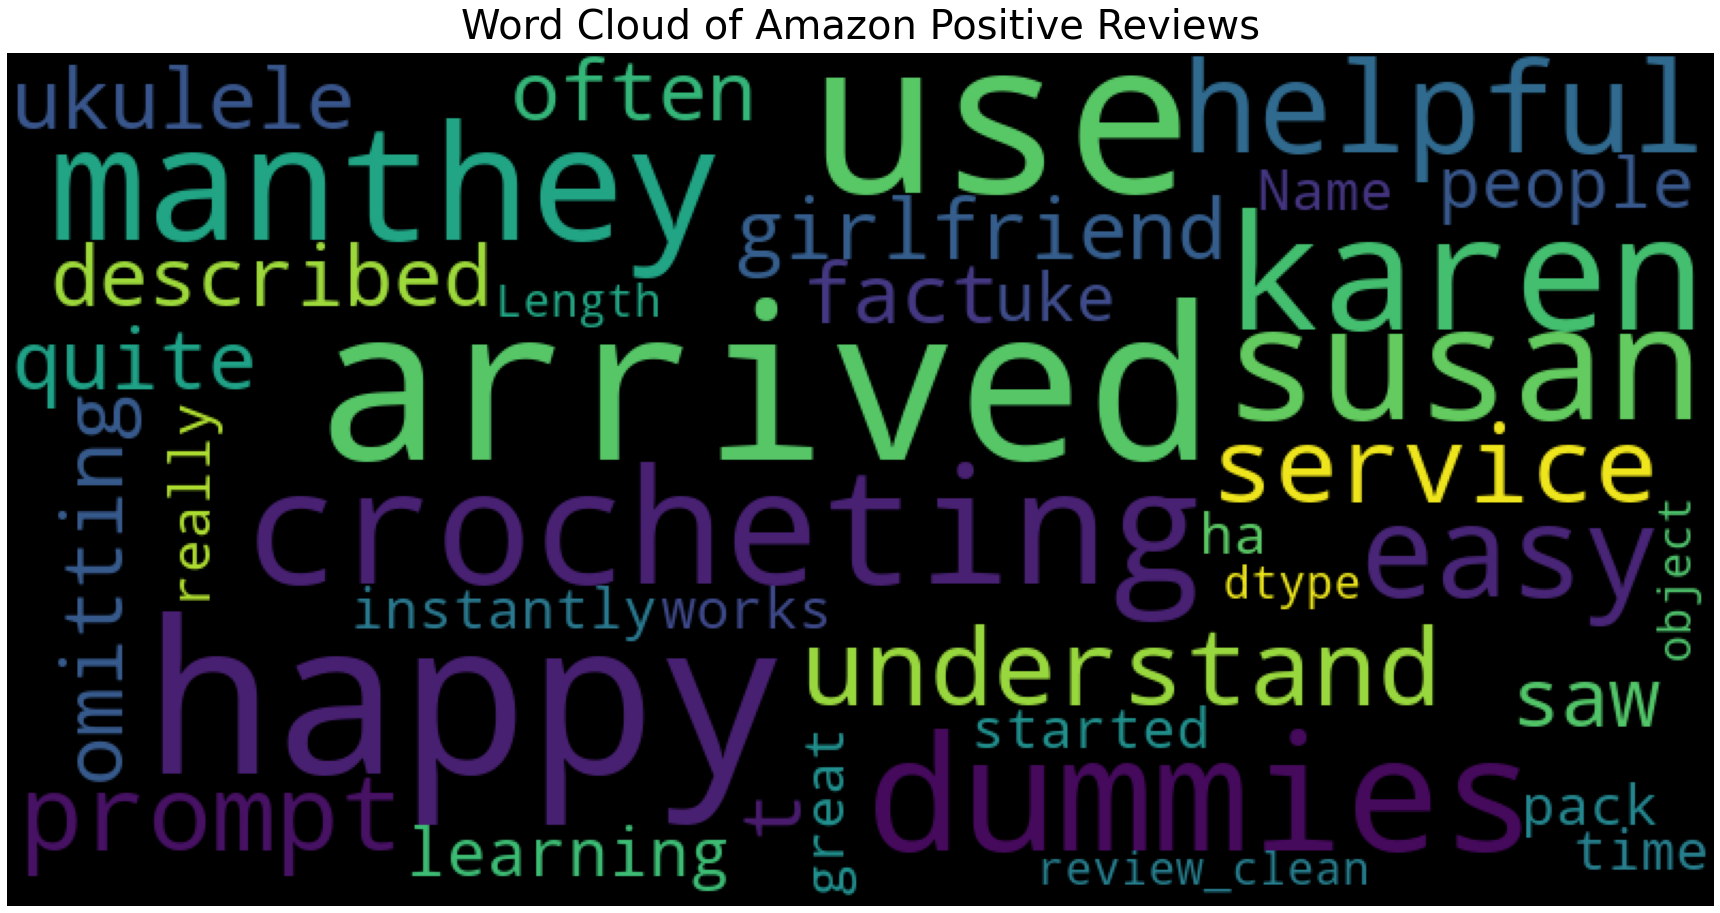

In [60]:
# assingn the words cloud
wordcloud_pos.generate(str(instruments_pos['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud_pos)
plt.title(f"Word Cloud of Amazon Positive Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

In [61]:
# assign the wordcloud
wordcloud_neg=WordCloud(background_color='black',stopwords=stop_words,max_words=100,
                   max_font_size=100,random_state=42,width=800,height=400)

<Figure size 2160x1440 with 0 Axes>

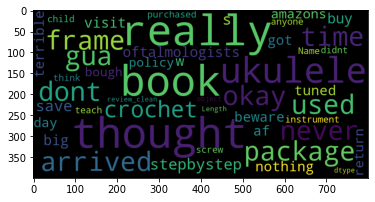

<Figure size 2160x1440 with 0 Axes>

In [62]:
wordcloud_neg.generate(str(instruments_neg['review_clean']))
plt.imshow(wordcloud_neg)
plt.figure( figsize=(30,20))


In [63]:
# assign the wordcloud
wordcloud_nu=WordCloud(background_color='black',width=800,height=400)

<Figure size 1728x1152 with 0 Axes>

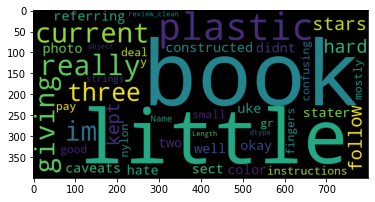

<Figure size 1728x1152 with 0 Axes>

In [64]:
wordcloud_nu.generate(str(instruments_nu['review_clean']))
plt.imshow(wordcloud_nu)
plt.figure(figsize=(24,16))


# Another Way to Look Most Common Positive and Negative Words

In [65]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Osama
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
def word_count(reviews):
    '''This function tokenize and count the words in text'''
    word_num={}
    for i in reviews:
        token=nltk.word_tokenize(i)
        for t in token:
            if t not in word_num.keys():
                word_num[t]=1
            else:
                word_num[t] +=1
    return word_num    
            

# Common words list in positive reviews

In [67]:
word_frequency=word_count(instruments_pos['review_clean'])

In [68]:
# to create dataframe from most common words dictionary
instruments_pos_count=pd.DataFrame(columns=['word','count'])
instruments_pos_count['word']=word_frequency.keys()
instruments_pos_count['count']=list(word_frequency.values())
instruments_pos_count=instruments_pos_count.sort_values(by=['count'],ascending=False)
instruments_pos_count=instruments_pos_count.reset_index(drop=True)

In [69]:
stop=set(stopwords.words('english')) # setting stopwords

In [70]:
# Taking only words which are not stopwords
instruments_pos_count['word_without_stop']=instruments_pos_count['word'].apply(lambda x:''.join([word for word in x.split()if word not in (stop)]))

In [71]:
# Dropping stop words column
instruments_pos_without_stop=instruments_pos_count.dropna(subset=['word_without_stop'])

In [72]:
instruments_top_pos=instruments_pos_count.loc[instruments_pos_count['word_without_stop']!=''].head(20)
instruments_top_pos


,word,count,word_without_stop
9,book,300,book
18,great,176,great
20,good,151,good
26,learn,113,learn
29,guitar,102,guitar
31,ukulele,96,ukulele
32,play,92,play
34,crochet,84,crochet
36,one,83,one
37,would,82,would


<AxesSubplot:title={'center':'Positive Reviews Common words'}, xlabel='word', ylabel='count'>

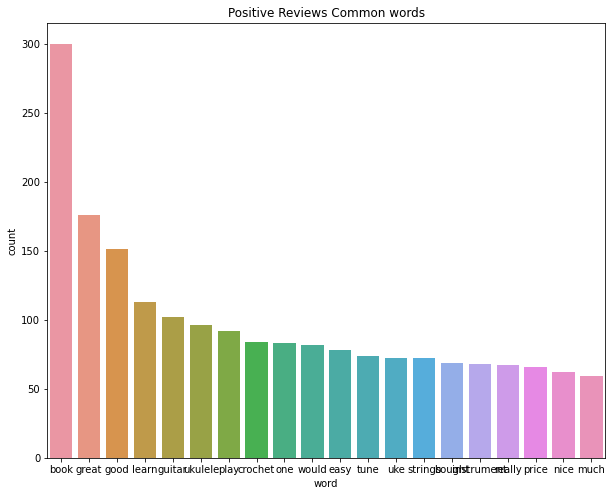

In [73]:
plt.figure(figsize=(10,8))
plt.title('Positive Reviews Common words')
sns.barplot('word','count',data=instruments_top_pos)

# Common word list in negative Reviews

In [74]:
word_frequency_neg=word_count(instruments_neg['review_clean'])


In [75]:
instruments_neg_count=pd.DataFrame(columns=['word','count'])
instruments_neg_count['word']=word_frequency_neg.keys()
instruments_neg_count['count']=list(word_frequency_neg.values())
instruments_neg_count=instruments_neg_count.sort_values(by=['count'],ascending=False)
instruments_neg_count=instruments_neg_count.reset_index(drop=True)

In [76]:
instruments_neg_count['word_without_stop']=instruments_neg_count['word'].apply(lambda x : ''.join([word for word in x.split() if word not in (stop)]))

In [77]:
instruments_neg_without_stop=instruments_neg_count.dropna(subset=['word_without_stop'])

In [78]:
instruments_top_neg=instruments_neg_count.loc[instruments_neg_count['word_without_stop']!=''].head(20)
instruments_top_neg

,word,count,word_without_stop
12,tune,79,tune
14,ukulele,69,ukulele
19,strings,48,strings
26,instrument,45,instrument
27,one,43,one
30,quality,39,quality
31,would,39,would
33,book,39,book
36,play,36,play
37,get,36,get


<AxesSubplot:title={'center':'Negative reviews common words'}, xlabel='word', ylabel='count'>

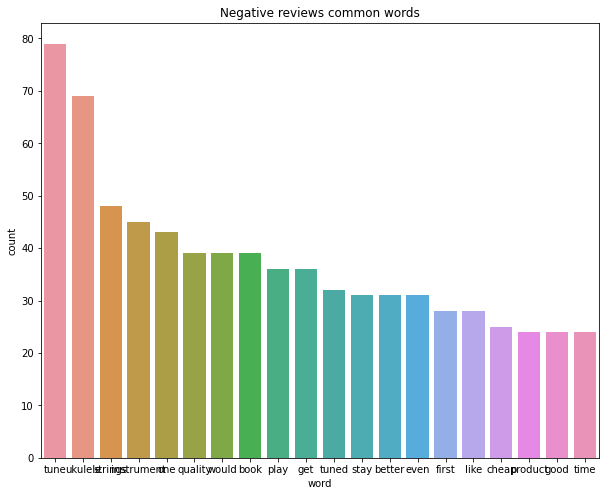

In [79]:
plt.figure(figsize=(10,8))
plt.title('Negative reviews common words')
sns.barplot('word','count',data=instruments_top_neg)

In [80]:
instruments['sentiment'].value_counts()

2    549
0    172
1     79
Name: sentiment, dtype: int64

In [81]:
# Taking 50 sample from each class
instruments_0=instruments.loc[instruments['sentiment']==0].head(50)

In [82]:
instruments_1=instruments.loc[instruments['sentiment']==1].head(50)

In [83]:
instruments_2=instruments.loc[instruments['sentiment']==2].head(50)

In [84]:
frames=[instruments_0,instruments_1,instruments_2]
instruments_sampled=pd.concat(frames) # getting together

In [85]:
instruments_sampled['sentiment'].value_counts()

0    50
1    50
2    50
Name: sentiment, dtype: int64

In [86]:
 # split train and test
x_train,x_test,y_train,y_test=train_test_split(instruments['review_clean'],instruments['sentiment'],test_size=0.2)

In [87]:
x_train.shape

(640,)

In [88]:
x_test.shape

(160,)

In [89]:
# define vectorize and fit the data
word_vectorizer=TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern='r\w{1,}',
                                stop_words='english',ngram_range=(1,1),max_features=1000)
word_vectorizer.fit(instruments['review_clean'])

TfidfVectorizer(max_features=1000, stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='r\\w{1,}')

In [90]:
# train_test vectorize features
train_word_features=word_vectorizer.transform(x_train)
test_word_features=word_vectorizer.transform(x_test)

In [91]:
# Choosing and filtering classifier
classifier=LogisticRegression(class_weight='balanced',C=0.5,solver='sag')
classifier.fit(train_word_features,y_train)

LogisticRegression(C=0.5, class_weight='balanced', solver='sag')

Accuracy:
TRAIN: 0.8203125
TEST: 0.69375

Balanced Accuracy:
TRAIN: 0.7925756420035596
TEST: 0.5327380952380952


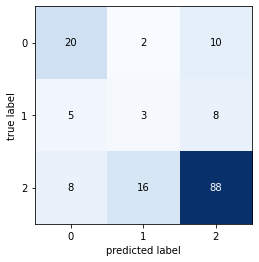

In [92]:
# calculating results 
y_pred_train = classifier.predict(train_word_features)
y_pred = classifier.predict(test_word_features)
          
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)
plt.show()

In [135]:
instruments.to_csv('cleaned_data.csv',index=False) # to keep merged,preprocessed and cleaned version